# CODE BLOCKS TO GET BEST ACTIVATION FUNCTION FOR OUR MODEL

<p>In this part we are trying  3 different activation functions and the final summary is reported in CM6</p>

### PREPARATION OF DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from numpy.random import seed
seed(0)
tf.random.set_seed(0)

In [2]:
dataset = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True)
data_dict = np.array(dataset)

values = data_dict[()]['features']
labels = data_dict[()]['target']

features = []
for i in range(60000):
    features.append(values[i].flatten())
features = np.array(features)

final_features = pd.DataFrame(features)
final_features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


In [3]:
from sklearn.preprocessing import OneHotEncoder
labels = pd.DataFrame(labels, columns = ['output'])

categorical_cols = ['output']
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)
encoded_labels = encoder.fit_transform(labels[categorical_cols])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, encoded_labels, test_size = 0.1, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## ACTIVATION FUNCTION 2: SIGMOID

In [5]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 2, activation = 'sigmoid', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(Dropout(drop_rate_1))

cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 4, activation = 'sigmoid'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'sigmoid'))


# second and third hidden layer
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'sigmoid'))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid'))
cnn.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [6]:
# Compiling the model 
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
filepath = 'best_model_sigmoid.wts.h5'

fitted_model = cnn.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 0.8071 - accuracy: 0.7055
Epoch 00001: val_loss improved from inf to 1.46948, saving model to best_model_sigmoid.wts.h5
81/81 [==============================] - 201s 2s/step - loss: 0.8071 - accuracy: 0.7055 - val_loss: 1.4695 - val_accuracy: 0.6552
Epoch 2/100
81/81 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8408
Epoch 00002: val_loss improved from 1.46948 to 1.41364, saving model to best_model_sigmoid.wts.h5
81/81 [==============================] - 210s 3s/step - loss: 0.3963 - accuracy: 0.8408 - val_loss: 1.4136 - val_accuracy: 0.8050
Epoch 3/100
81/81 [==============================] - ETA: 0s - loss: 0.3263 - accuracy: 0.8695
Epoch 00003: val_loss improved from 1.41364 to 1.32662, saving model to best_model_sigmoid.wts.h5
81/81 [==============================] - 163s 2s/step - loss: 0.3263 - accuracy: 0.8695 - val_loss: 1.3266 - val_accuracy: 0.8274
Epoch 4/100
81/81 [================

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 96)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 96)        384       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 256)       393472    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

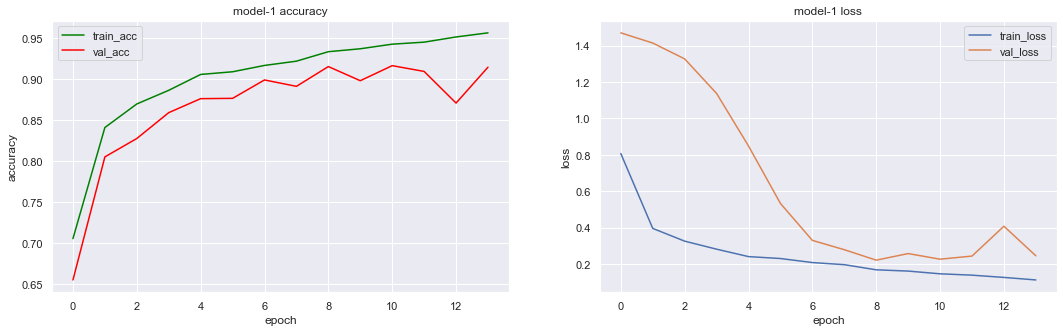

In [9]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model.history['loss'], label = 'train_loss')
plt.plot(fitted_model.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [10]:
print("Mean val acc:", np.mean(fitted_model.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model.history['loss']))

Mean val acc: 0.8650793646063123
Mean val loss: 0.6388726894344602
Mean train acc: 0.9012698403426579
Mean train loss: 0.25348380314452307


In [11]:
y_pred = cnn.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append(1)
            elif j == 1:
                true_values.append(2)
            elif j == 2:
                true_values.append(3)
            elif j == 3:
                true_values.append(4)
            elif j == 4:
                true_values.append(5)

result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append(1)
            elif j == 1:
                result.append(2)
            elif j == 2:
                result.append(3)
            elif j == 3:
                result.append(4)
            elif j == 4:
                result.append(5)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
score =accuracy_score(true_values, result) 
print(f'The test set accuracy obtained: {score*100} %')

The test set accuracy obtained: 90.71666666666667 %


## ACTIVATION FUNCTION 3: TANH

In [13]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn_2 = tf.keras.models.Sequential()
cnn_2.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 2, activation = 'tanh', input_shape = [28,28,1]))
cnn_2.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn_2.add(tf.keras.layers.BatchNormalization())
cnn_2.add(Dropout(drop_rate_1))

cnn_2.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 4, activation = 'tanh'))
cnn_2.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn_2.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn_2.add(tf.keras.layers.Dense(units = 512, activation = 'tanh'))


# second and third hidden layer
cnn_2.add(tf.keras.layers.Dense(units = 256, activation = 'tanh'))
cnn_2.add(tf.keras.layers.Dense(units = 128, activation = 'tanh'))
cnn_2.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [14]:
# Compiling the model 
cnn_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
filepath = 'best_model_sigmoid.wts.h5'

fitted_model_2 = cnn_2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 0.6322 - accuracy: 0.7596
Epoch 00001: val_loss improved from inf to 0.64023, saving model to best_model_sigmoid.wts.h5
81/81 [==============================] - 137s 2s/step - loss: 0.6322 - accuracy: 0.7596 - val_loss: 0.6402 - val_accuracy: 0.7450
Epoch 2/100
81/81 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.8471
Epoch 00002: val_loss did not improve from 0.64023
81/81 [==============================] - 143s 2s/step - loss: 0.3783 - accuracy: 0.8471 - val_loss: 1.4555 - val_accuracy: 0.5541
Epoch 3/100
81/81 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8643
Epoch 00003: val_loss did not improve from 0.64023
81/81 [==============================] - 144s 2s/step - loss: 0.3419 - accuracy: 0.8643 - val_loss: 1.8250 - val_accuracy: 0.5169
Epoch 4/100
81/81 [==============================] - ETA: 0s - loss: 0.3046 - accuracy: 0.8775
Epoch 00004: val_loss did not impr

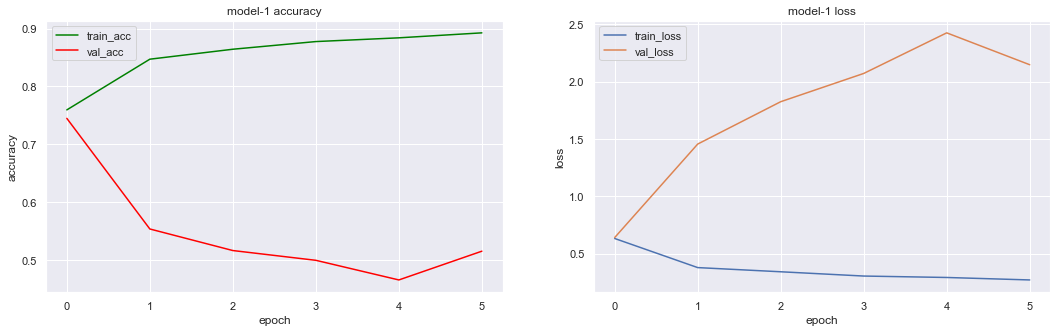

In [16]:
fig = plt.figure(figsize=(18,5))
# summarize history for accuracy
plt.subplot(121)
plt.plot(fitted_model_2.history['accuracy'], c = 'green', label = 'train_acc')
plt.plot(fitted_model_2.history['val_accuracy'], c = 'red', label = 'val_acc')
plt.title('model-1 accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.xlabel('epoch')

plt.subplot(122)
# summarize history for loss
plt.plot(fitted_model_2.history['loss'], label = 'train_loss')
plt.plot(fitted_model_2.history['val_loss'], label = 'val_loss')
plt.title('model-1 loss')
plt.ylabel('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [17]:
print("Mean val acc:", np.mean(fitted_model_2.history['val_accuracy']))
print("Mean val loss:", np.mean(fitted_model_2.history['val_loss']))
print("Mean train acc:", np.mean(fitted_model_2.history['accuracy']))
print("Mean train loss:", np.mean(fitted_model_2.history['loss']))

Mean val acc: 0.5496296286582947
Mean val loss: 1.7608478864034016
Mean train acc: 0.8541666666666666
Mean train loss: 0.36994073788324994


In [18]:
y_pred = cnn_2.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append(1)
            elif j == 1:
                true_values.append(2)
            elif j == 2:
                true_values.append(3)
            elif j == 3:
                true_values.append(4)
            elif j == 4:
                true_values.append(5)

result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append(1)
            elif j == 1:
                result.append(2)
            elif j == 2:
                result.append(3)
            elif j == 3:
                result.append(4)
            elif j == 4:
                result.append(5)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
score =accuracy_score(true_values, result) 
print(f'The test set accuracy obtained: {score*100} %')

The test set accuracy obtained: 50.24999999999999 %


<P>Final comparison of results and run time performance are reported in a tabular form in CM6</P>